# Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

# Reading dataset

In [2]:
df_Hiring = pd.read_csv("recruitment_data.csv")
Hiring_df = df_Hiring.copy()
#Displaying the first 5 rows
df_Hiring.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


# Exploratory Data Analysis (EDA)

In [3]:
df_Hiring.shape

(1500, 11)

The data set has 1500 rows and 11 columns

In [4]:
df_Hiring.columns

Index(['Age', 'Gender', 'EducationLevel', 'ExperienceYears',
       'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore',
       'SkillScore', 'PersonalityScore', 'RecruitmentStrategy',
       'HiringDecision'],
      dtype='object')

In [5]:
dataSize = df_Hiring.size
print(f'The dataset is of size {dataSize}')

The dataset is of size 16500


In [6]:
df_Hiring.dtypes

Age                      int64
Gender                   int64
EducationLevel           int64
ExperienceYears          int64
PreviousCompanies        int64
DistanceFromCompany    float64
InterviewScore           int64
SkillScore               int64
PersonalityScore         int64
RecruitmentStrategy      int64
HiringDecision           int64
dtype: object

In [7]:
df_Hiring.isnull().sum()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

In [8]:
df_Hiring.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


Hiring Decision is our target variable, 1 = Hired and 0 = Not hired

# Univariate Analysis

## 1. Target Variable

In [9]:
# Frequency table of our variable will give us the count of each category in Hiring Decision varible
df_Hiring['HiringDecision'].value_counts()

HiringDecision
0    1035
1     465
Name: count, dtype: int64

In [10]:
df_Hiring['HiringDecision'].value_counts(normalize = True)

HiringDecision
0    0.69
1    0.31
Name: proportion, dtype: float64

From 1500 applicants only 465 applicants are hired a representation of 31% of the entire applicant.

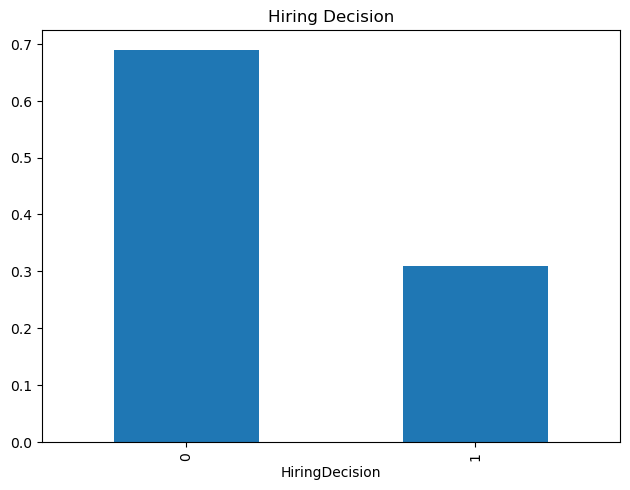

In [11]:
df_Hiring['HiringDecision'].value_counts(normalize = True).plot.bar()
plt.tight_layout()
plt.savefig('HiringDecision.png')
plt.title('Hiring Decision')
plt.show()

## 2. Other Varible analysis

<Axes: xlabel='Gender'>

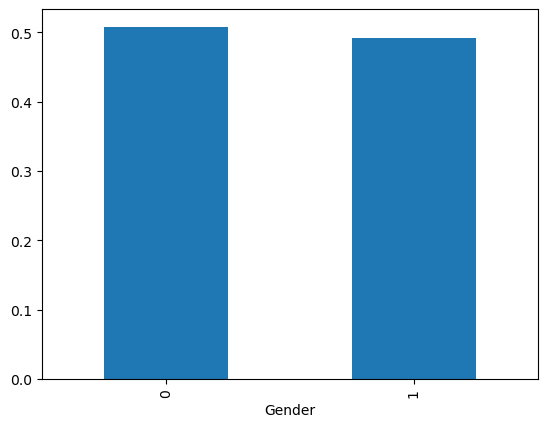

In [12]:
df_Hiring['Gender'].value_counts(normalize = True).plot.bar()

Applicants are relatively equally distributed across the genders; when 0 is male, then 1 is female, and vice versa.

<Axes: xlabel='ExperienceYears'>

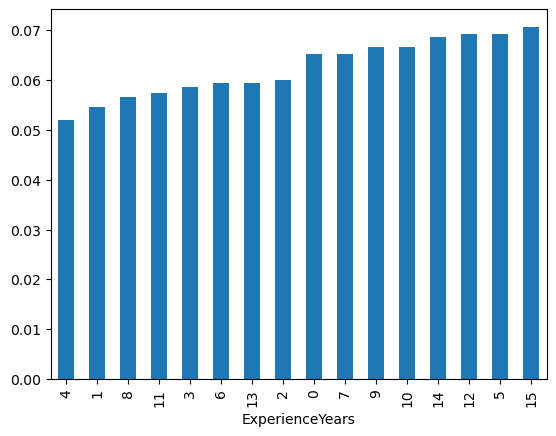

In [13]:
sort_Count = df_Hiring['ExperienceYears'].value_counts(normalize = True).sort_values(ascending=True)
sort_Count.plot.bar()

Applicants with the highest years of Experince make most of job application

In [14]:
EldestApplicant = df_Hiring['Age'].max()
YoungestApplicant = df_Hiring['Age'].min()
print(f'The youngest applicant is {YoungestApplicant} years' )
print(f'The eldest applicant is {EldestApplicant} years' )

The youngest applicant is 20 years
The eldest applicant is 50 years


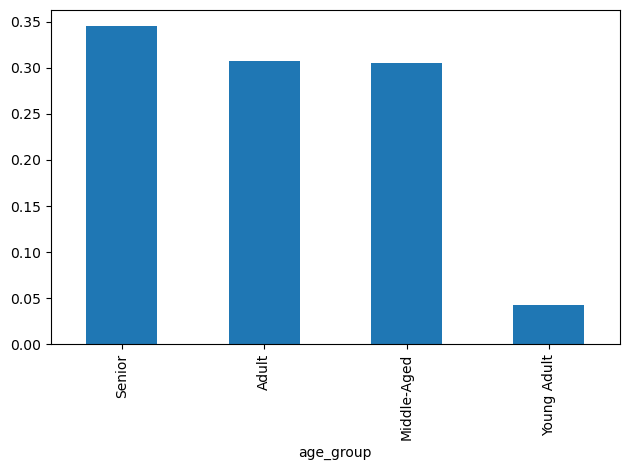

In [15]:
age_bin = [0, 20, 30, 40, 50]
age_category=['Young Adult', 'Adult', 'Middle-Aged', 'Senior']
df_Hiring['age_group'] = pd.cut(df_Hiring['Age'],age_bin, labels = age_category )
df_Hiring['age_group'].value_counts(normalize = True).plot.bar()
plt.tight_layout()

Majority of job application are being made my the senior applicants

# Bivariate Analysis

Applicants with the most years of experience are predominantly hired.  
Applicants with the highest level of education are preferred for jobs.  
Job hiring does not depend on the gender of an applicant; all genders have an equal chance of being hired.  
Older applicants have a higher chance of being employed compared to younger applicants.  al.

## 1. Hiring Decision Vs Age

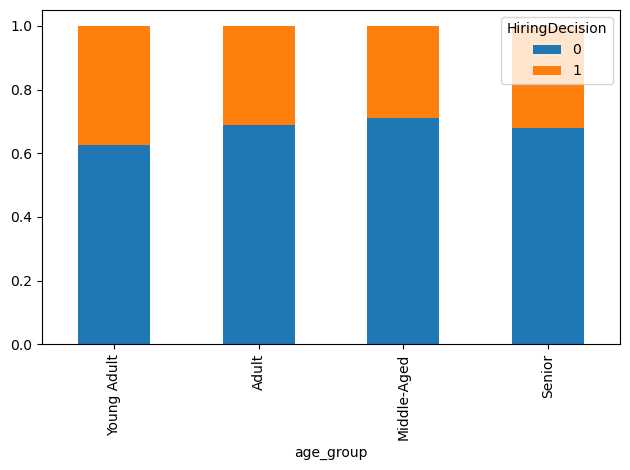

In [16]:
age_bin = [0, 20, 30, 40, 50]
age_category=['Young Adult', 'Adult', 'Middle-Aged', 'Senior']
df_Hiring['age_group'] = pd.cut(df_Hiring['Age'],age_bin, labels = age_category )

age_group = pd.crosstab(df_Hiring['age_group'], df_Hiring['HiringDecision'])
age = age_group.div(age_group.sum(1).astype(float), axis = 0)

age.plot(kind = 'bar', stacked = True)
plt.tight_layout()

Young adults have the highest chance of being hired, contradicting our hypothesis that senior applicants have a higher chance of being hired

<Axes: xlabel='EducationLevel'>

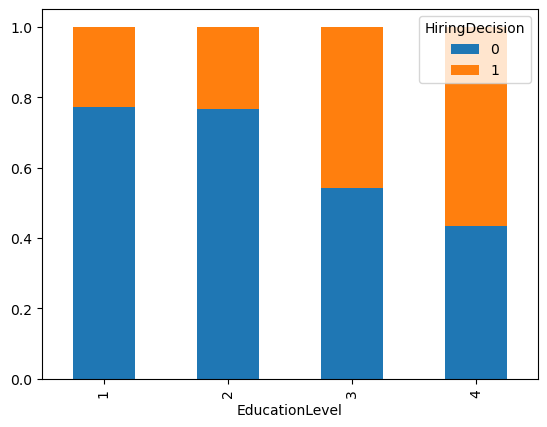

In [17]:
Education_Level = pd.crosstab(df_Hiring['EducationLevel'], df_Hiring['HiringDecision'])
educationLevel = Education_Level.div(Education_Level.sum(1).astype(float), axis = 0)

educationLevel.plot(kind = 'bar', stacked = True)

Applicants with the highest level of education have a good chance of being hired, which aligns with our hypothesis

<Axes: xlabel='bins_group'>

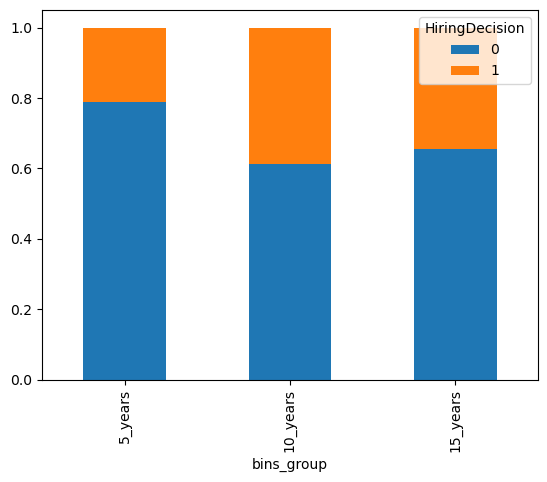

In [18]:
bins = [0, 5, 10, 15]
bins_group = ['5_years', '10_years', '15_years']
df_Hiring['bins_group'] =pd.cut(df_Hiring['ExperienceYears'], bins, labels = bins_group) 
bins_group = pd.crosstab(df_Hiring['bins_group'], df_Hiring['HiringDecision'])
years_experience = bins_group.div(bins_group.sum(1).astype(float), axis = 0)

years_experience.plot(kind = 'bar', stacked = True)

Applicants with the highest years of experince stand a chance of being hired.

<Axes: xlabel='PreviousCompanies'>

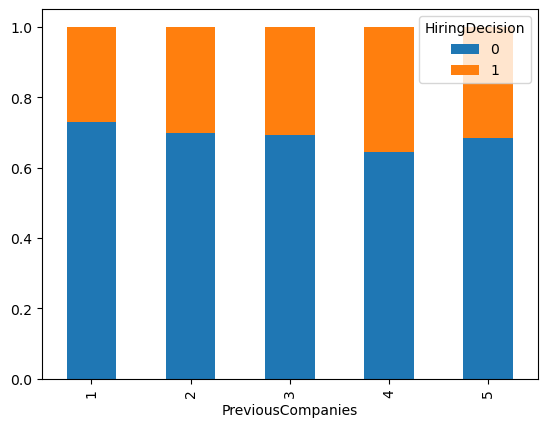

In [19]:
PreviousCompanies = pd.crosstab(df_Hiring['PreviousCompanies'], df_Hiring['HiringDecision'])
previous_Companies = PreviousCompanies.div(PreviousCompanies.sum(1).astype(float), axis = 0)
previous_Companies.plot(kind = 'bar', stacked = True)

The number of companies an applicant has worked before is a factor in job hiring, those with highest number stand a chance of being hired

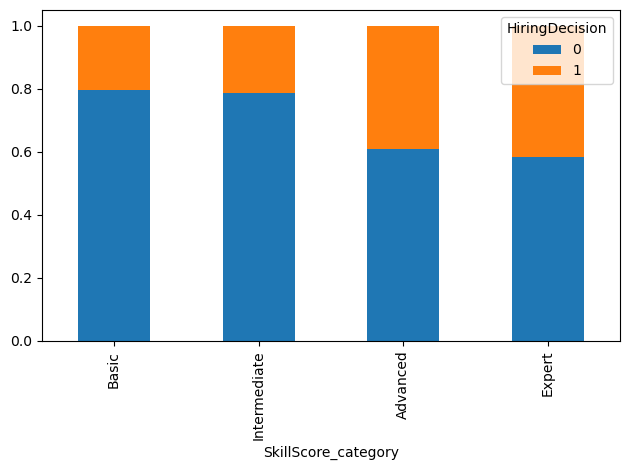

In [20]:
SkillScore_bins = [0, 25, 50, 75, 100]
SkillScore_category = ['Basic', 'Intermediate', 'Advanced', 'Expert']
df_Hiring['SkillScore_category'] = pd.cut(df_Hiring['SkillScore'], SkillScore_bins, labels = SkillScore_category)
SkillScore_category = pd.crosstab(df_Hiring['SkillScore_category'], df_Hiring['HiringDecision'])
skills_score = SkillScore_category.div(SkillScore_category.sum(1).astype(float), axis = 0)
skills_score.plot(kind = 'bar', stacked = True)
plt.tight_layout()

Applicants with expert skills stand a chance of being hired

## 3. HeatMap

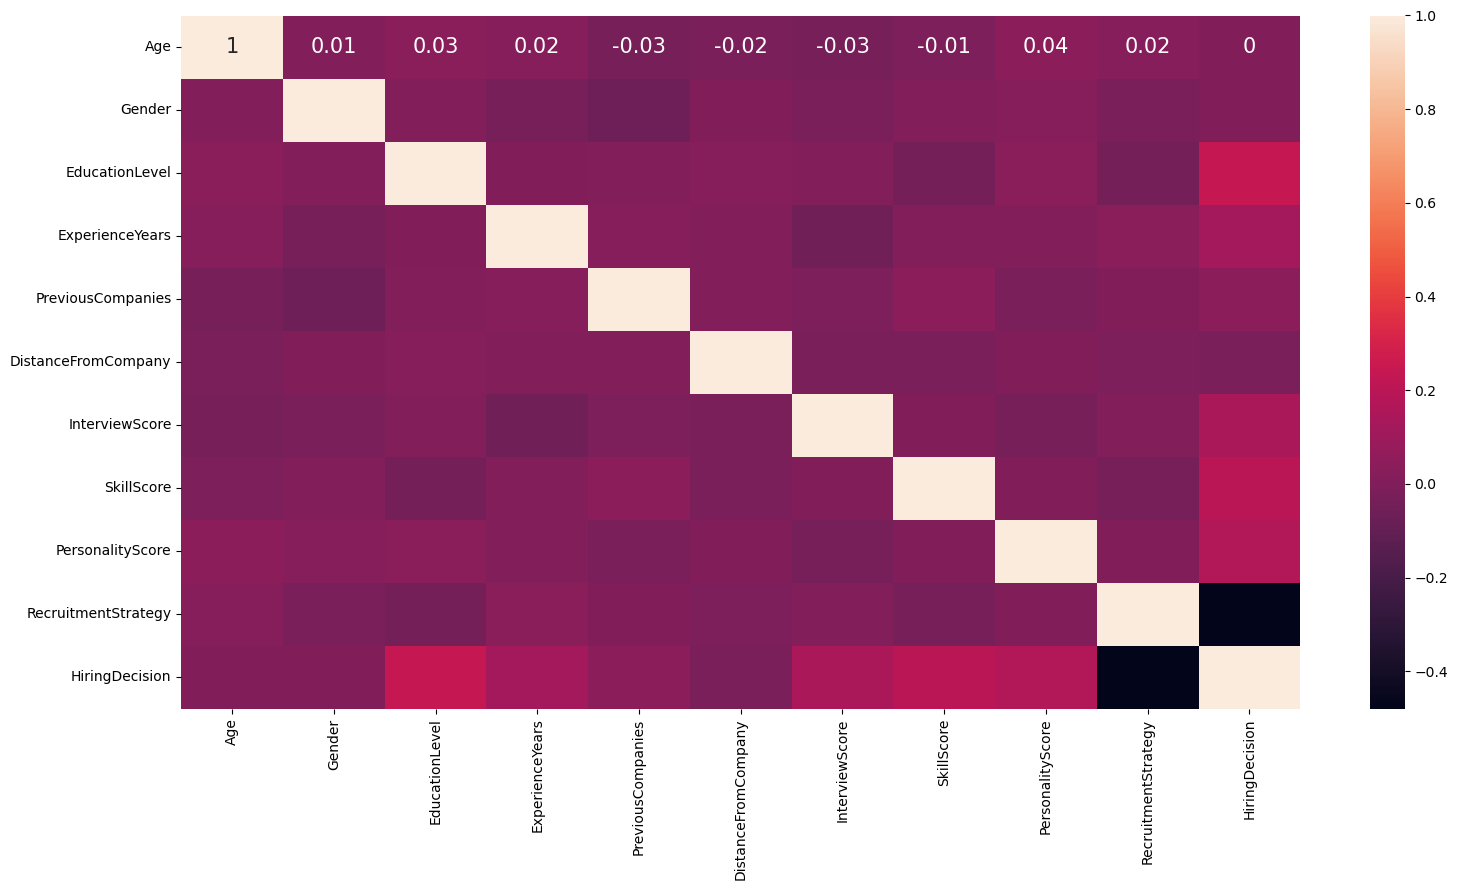

In [21]:
df_Hiring = df_Hiring.drop(['age_group', 'bins_group', 'SkillScore_category'], axis = 1)

matrix = df_Hiring.corr()

plt.figure(figsize = (16, 9))
sns.heatmap(matrix.round(2), annot = True, annot_kws={'size': 15})

# Show the plot
plt.tight_layout()
plt.savefig('Heat_Map.png')
plt.show()

# Modeling 

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split                   
from sklearn.metrics import classification_report     
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [23]:
# Prepare features and target variable
X = df_Hiring.drop('HiringDecision', axis = 1)
y = df_Hiring.HiringDecision

# Split the data into training and validation sets
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)


## Logistic Regression

In [24]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [25]:
# Make predictions on the validation set
y_pred = model.predict(x_cv)

# Validate the predictions
accuracy = accuracy_score(y_cv, y_pred)
conf_matrix = confusion_matrix(y_cv, y_pred)
class_report = classification_report(y_cv, y_pred)

print("Accuracy: ", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy:  0.8488888888888889
Confusion Matrix:
 [[277  27]
 [ 41 105]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       304
           1       0.80      0.72      0.76       146

    accuracy                           0.85       450
   macro avg       0.83      0.82      0.82       450
weighted avg       0.85      0.85      0.85       450



## Decision Tree

In [26]:
Dectree = DecisionTreeClassifier()
Dectree.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
# Make predictions on the validation set
y_pred = Dectree.predict(x_cv)

# Validate the predictions
accuracy = accuracy_score(y_cv, y_pred)
conf_matrix = confusion_matrix(y_cv, y_pred)
class_report = classification_report(y_cv, y_pred)

print("Accuracy: ", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy:  0.86
Confusion Matrix:
 [[271  33]
 [ 30 116]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       304
           1       0.78      0.79      0.79       146

    accuracy                           0.86       450
   macro avg       0.84      0.84      0.84       450
weighted avg       0.86      0.86      0.86       450



## Random Forest

In [28]:
RandForest = RandomForestClassifier()
RandForest.fit(x_train, y_train)

RandomForestClassifier()

In [29]:
# Make predictions on the validation set
y_pred = RandForest.predict(x_cv)

# Validate the predictions
accuracy = accuracy_score(y_cv, y_pred)
conf_matrix = confusion_matrix(y_cv, y_pred)
class_report = classification_report(y_cv, y_pred)

print("Accuracy: ", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy:  0.9177777777777778
Confusion Matrix:
 [[293  11]
 [ 26 120]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       304
           1       0.92      0.82      0.87       146

    accuracy                           0.92       450
   macro avg       0.92      0.89      0.90       450
weighted avg       0.92      0.92      0.92       450

